In [57]:
%matplotlib inline
import pandas as pd
import numpy as np
import random

In [71]:
def rmsle(y, y_):
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    
    return np.sqrt(np.mean(calc))

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [2]:
# Load Train Data
data = pd.read_csv('data/train.csv')

# Split into Train and Validation sets
split_point = int(len(data) * 0.8)
data = data.reindex(np.random.permutation(data.index))

train_data = data[:split_point]
val_data = data[split_point:]

print('Training data({0[0]},{0[1]})'.format(train_data.shape))
print(train_data.head())
print()
print('Validation data({0[0]},{0[1]})'.format(val_data.shape))
print(val_data.head())

Training data(1168,81)
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
891    892          60       RL         70.0    11184   Pave   NaN      Reg   
916    917          20  C (all)         50.0     9000   Pave   NaN      Reg   
582    583          90       RL         81.0    11841   Grvl   NaN      Reg   
1062  1063         190       RM         85.0    13600   Pave  Grvl      Reg   
58      59          60       RL         66.0    13682   Pave   NaN      IR2   

     LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
891          Lvl    AllPub    ...            0    NaN   NaN         NaN   
916          Lvl    AllPub    ...            0    NaN   NaN         NaN   
582          Lvl    AllPub    ...            0    NaN   NaN         NaN   
1062         Lvl    AllPub    ...            0    NaN   NaN         NaN   
58           HLS    AllPub    ...            0    NaN   NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition

In [50]:
# Extract X(with 1 feature) and Y from the train and test sets
X_train = train_data[['1stFlrSF','2ndFlrSF']]
y_train = train_data['SalePrice']


X_val = val_data[['1stFlrSF','2ndFlrSF']]
y_val = val_data['SalePrice']

In [51]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [72]:
# Generate Metrics on Validation Set
from sklearn.metrics import mean_squared_error

print("Validation Metrics")
r2 = lin_reg.score(X_val, y_val)
print('R-Squared: ', r2)

y_pred = lin_reg.predict(X_val)
rmsle_val = rmsle(y_val, y_pred)
rmse_val = rmse(y_val, y_pred)
print('Root Mean Squared Logarithmic Error: ', rmsle_val)
print('Root Mean Squared Error: ', rmse_val)

Validation Metrics
R-Squared:  0.615157121116
Root Mean Squared Logarithmic Error:  0.235369397958
Root Mean Squared Error:  44778.9532085


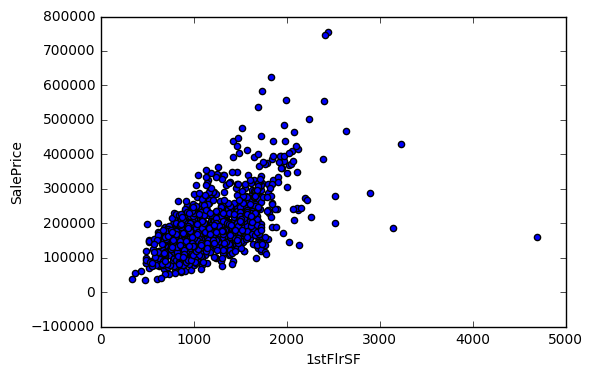

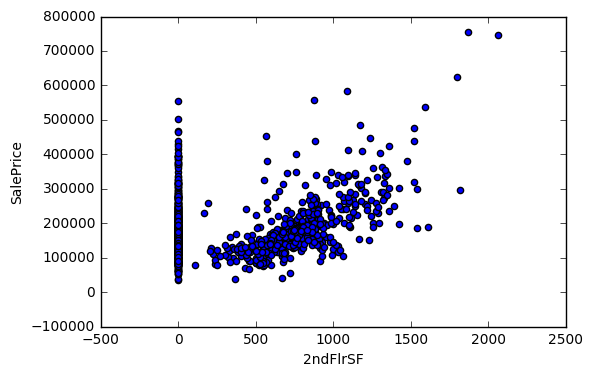

In [59]:
# Plot Metrics
train_data.plot.scatter('1stFlrSF', 'SalePrice')
train_data.plot.scatter('2ndFlrSF', 'SalePrice')

In [74]:
# Load Test Dataset
df_test = pd.read_csv('data/test.csv')
X_test = df_test[['1stFlrSF','2ndFlrSF']]
y_pred_test = lin_reg.predict(X_test)


In [84]:
# Generate Test Set Results
pred = df_test[['Id']]
pred['SalePrice'] = y_pred_test.tolist()

print('Results data({0[0]},{0[1]})'.format(pred.shape))
print(pred.head())

Results data(1459,2)
     Id      SalePrice
0  1461  114184.596247
1  1462  175647.679826
2  1463  177427.476986
3  1464  175217.601081
4  1465  168692.273139


/Users/rbales/.virtualenvs/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [88]:
# Save Output
pred.to_csv('submission.csv', index=False)